# Evaluation Metrics for LLMs: BLEU and ROUGE

Understanding and Comparing the Standard Metrics for Assessing Language Model Performance

## What is LLM evaluation?

Understanding and evaluating LLM performance is essential for ensuring their effectiveness in real-world applications. This evaluation process not only highlights the model's strengths and weaknesses but also helps mitigate risks like biased or misleading content. There are two primary types of LLM evaluation:

1. **Model Evaluation**: This assesses the core capabilities of the LLM itself.

2. **System Evaluation**: This examines how the LLM performs within a specific program or when interacting with user input.

Before launching your LLM application to production, consider the following key evaluation metrics. These metrics serve as scoring mechanisms that assess the LLM's outputs based on specific criteria:

1. **Response Completeness and Conciseness**: Determines if the LLM's response fully resolves the user query and evaluates the relevance of the generated response.

2. **Text Similarity Metrics**: Compare the generated text to a reference or benchmark text to gauge similarity, providing a score that reflects the LLM's performance.

3. **Question Answering Accuracy**: Measures how accurately the LLM answers questions based on factual correctness.

4. **Relevance**: Assesses the relevancy of the LLM's response to a given prompt or user question.

5. **Hallucination Index**: Identifies the extent to which the LLM fabricates information or produces biased output for a given prompt.

6. **Toxicity**: Determines the percentage of offensive or harmful language in the LLM’s output.

7. **Task-Specific Metrics**: Depend on the type of task and application (e.g., summarization, translation). Examples include the BLEU score for machine translation.

## LLM Evaluation Frameworks and Tools

LLM evaluation frameworks and tools are crucial for providing standardized benchmarks to measure and enhance the performance, reliability, and fairness of language models. Here are some notable LLM evaluation frameworks and tools:

1. **BLEU (BiLingual Evaluation Understudy)**:
A metric used to gauge the similarity of machine-translated text to high-quality reference translations, ranging from 0 to 1.

2. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**:
A set of metrics that measure the overlap and similarity between the generated summary and a reference human benchmark. ROUGE provides four individual metrics:

   * **ROUGE-1**: Measures the overlap of unigrams (single words).

   * **ROUGE-2**: Measures the overlap of bigrams (pairs of words).

   * **ROUGE-L**: Measures the longest common subsequence, rewarding longer shared sequences between the generated and reference summaries.

   * **ROUGE-LSUM**: Calculated as the length of the longest common subsequence divided by the sum of the lengths of the generated summary and the reference summary.

3. **EleutherAI LM Eval**:
Facilitates few-shot evaluation and performance measurement across a broad range of tasks with minimal fine-tuning.

4. **MMLU**:
An evaluation framework that tests models on a wide array of subjects using zero-shot and one-shot settings.

5. **DeepEval**:
An open-source framework that aids organizations in evaluating LLM applications by quantifying performance on metrics such as contextual recall, answer relevance, and faithfulness.

6. **SQuAD (Stanford Question Answering Dataset)**:
A dataset for evaluating LLMs in question-answering tasks, featuring context passages and corresponding questions linked to specific answers.

7. **OpenAI Evals**:
A standard framework by OpenAI for evaluating LLMs, including an open-source registry of benchmarks to ensure model accuracy.

8. **UpTrain**:
An open-source LLM evaluation tool offering pre-built metrics to check LLM responses on aspects like correctness, hallucination, and toxicity.

9. **H2O LLM EvalGPT**:
An open tool for understanding a model’s performance across a variety of tasks and benchmarks.

10. **promptfoo**:
A CLI and library for assessing LLM output quality and performance, promptfoo allows systematic testing of prompts and models with predefined tests.

# BLEU

BLEU (Bilingual Evaluation Understudy) is a metric for evaluating the quality of machine-translated text by comparing it to reference human translations. It quantifies how much the machine-generated text resembles the human-generated text using a formula that combines precision for n-grams and a brevity penalty.

## Core Concepts:

1. **N-gram Precision**: BLEU assesses the match between n-grams (sequential groupings of n words) in the translated text and reference texts. It calculates the precision (P_n) for n-grams from 1 to 4, which is the number of n-gram matches divided by the total number of n-grams in the machine-translated text.

2. **Brevity Penalty (BP)**: To address the length discrepancy and discourage overly short translations, BLEU applies a brevity penalty. This penalty is a function of the translation length compared to the reference length and is calculated as follows: [ BP =
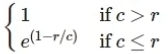

    ] where (c) is the length of the candidate translation and (r) is the effective reference corpus length.

BLEU (Bilingual Evaluation Understudy) is a standard metric used to evaluate the quality of text translated by machines, by measuring its similarity to human-generated reference translations. It helps in quantifying the precision of machine-translated text compared to the human standard.

BLEU Score Calculation:

The BLEU score is determined by calculating the weighted geometric mean of the precision scores for n-grams, combined with a brevity penalty.

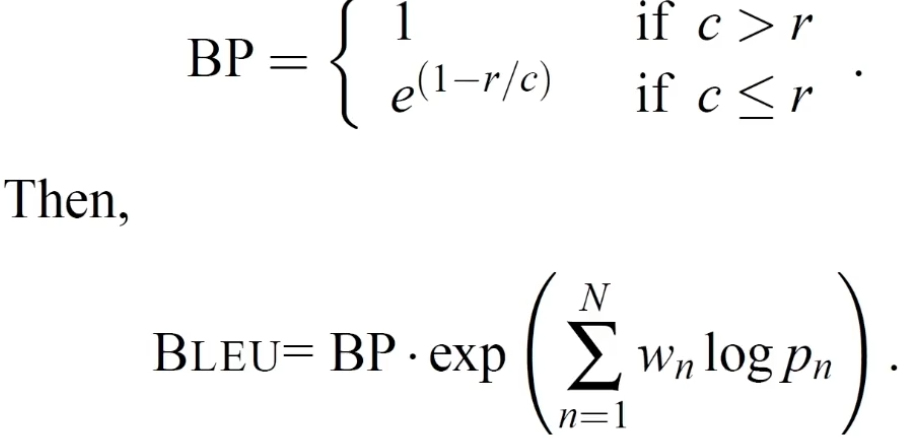


In [3]:
! pip install datasets transformers[sentencepiece]
! pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00


In [8]:
import evaluate

bleu = evaluate.load("bleu")

# Join tokens into strings (or write strings directly)
predictions = ["I have thirty six years"]
references  = [["I am thirty-six years old"]]

results = bleu.compute(predictions=predictions, references=references)
print(results)  # {'bleu': ..., 'precisions': ..., ...}



{'bleu': 0.0, 'precisions': [0.4, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 5, 'reference_length': 5}


In [9]:
token_preds = [["I", "have", "thirty", "six", "years"]]
token_refs  = [[["I", "am", "thirty-six", "years", "old"]]]

predictions = [" ".join(tokens) for tokens in token_preds]
references  = [[ " ".join(ref_tokens) for ref_tokens in refs ] for refs in token_refs]

results = bleu.compute(predictions=predictions, references=references)
print(results)


{'bleu': 0.0, 'precisions': [0.4, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 5, 'reference_length': 5}


In [10]:
! pip install sacrebleu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [12]:
# Load sacrebleu metric
sacrebleu = evaluate.load("sacrebleu")

# Predictions: list of strings
predictions = ["I have thirty six years"]

# References: list of list of strings
# (outer list aligns with predictions, inner list holds multiple refs per prediction)
references = [["I am thirty six years old", "I am thirty six"]]

# Compute BLEU
results = sacrebleu.compute(predictions=predictions, references=references)
print(results)



{'score': 42.7287006396234, 'counts': [4, 2, 1, 0], 'totals': [5, 4, 3, 2], 'precisions': [80.0, 50.0, 33.333333333333336, 25.0], 'bp': 1.0, 'sys_len': 5, 'ref_len': 4}


# ROUGE

The ROUGE metrics, particularly ROUGE-L, focus on evaluating the quality of text summaries by comparing them to reference summaries using specific formulas. ROUGE-L computes the similarity based on the longest common subsequence (LCS) found between the candidate summary and the reference summary. Here's how it is calculated:

# ROUGE-L Formula:

1. Recall & Precision:

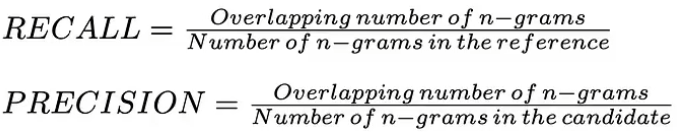

2. F1-Score (Harmonic Mean of Precision and Recall):

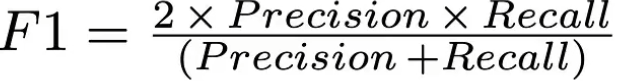

In [13]:
! pip install nltk rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=fbd98fa34597c070028fbd93415b557f2e7f7ae88bbbb5931fbfa8d0e3957e5b
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [15]:
# Load ROUGE
rouge = evaluate.load("rouge")

predictions = ["I really loved reading the Hunger Games"]
references  = ["I loved reading the Hunger Games"]

results = rouge.compute(predictions=predictions, references=references)
print(results)


{'rouge1': np.float64(0.923076923076923), 'rouge2': np.float64(0.7272727272727272), 'rougeL': np.float64(0.923076923076923), 'rougeLsum': np.float64(0.923076923076923)}
